In [2]:
!which python

/Users/itamar/anaconda2/envs/ciwsa/bin/python


In [85]:
import pandas
import numpy
import umap
from astropy.io import fits
from astropy.table import Table
import matplotlib.pyplot as plt
%matplotlib notebook

In [204]:
w = numpy.load('data/wavelength_grid_red.npy')
X = numpy.load('data/spectra_red.npy')
SpecObjIDS = numpy.load('data/specobjids_red.npy').astype(int)
nof_objects = X.shape[0]
nof_features = X.shape[1]
print('Number of galaxies: {}\nNumber of flux values: {}'.format(nof_objects, nof_features))

Number of galaxies: 50000
Number of flux values: 2676


In [142]:
%%time
print('UMAP is running ...')
n_neighbors, min_dist = 5, 0.01
umap_res = umap.UMAP(n_neighbors=n_neighbors,
                      min_dist=min_dist,
                      metric='euclidean').fit_transform(X)
print('Done!')

UMAP is running ...
Done!
CPU times: user 1min 25s, sys: 16.6 s, total: 1min 42s
Wall time: 1min 57s


<IPython.core.display.Javascript object>


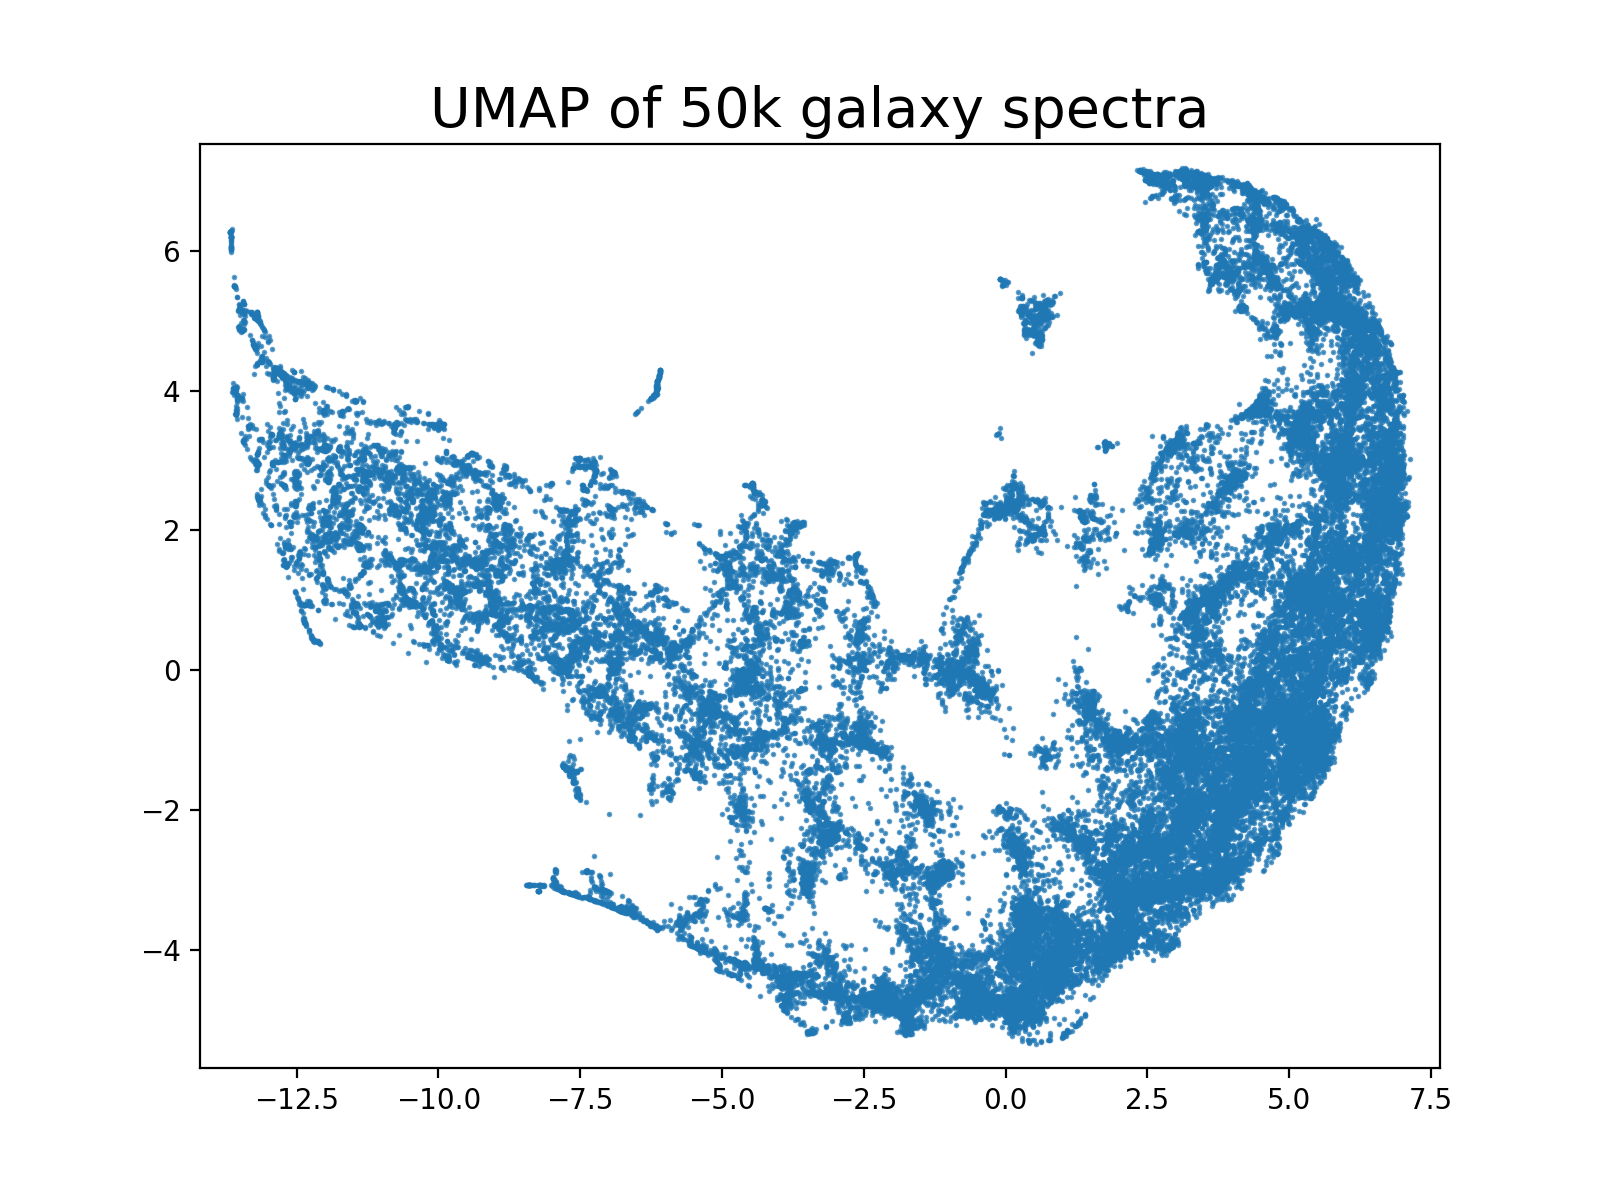

In [160]:
def get_plot_limit(v):
    # get the limit for a scatter plot that will exclude outliers
    
    inliers = numpy.where(abs(v - numpy.nanmean(v))/numpy.nanstd(v) < 5)[0]
    min_lim = numpy.nanmin(v[inliers])- numpy.nanstd(v)*0.1
    max_lim = numpy.nanmax(v[inliers])+ numpy.nanstd(v)*0.1
    
    #min_lim = numpy.nanpercentile(v, 1) - numpy.nanstd(v)*0.25
    #max_lim = numpy.nanpercentile(v, 99) + numpy.nanstd(v)*0.25
    
    return [min_lim, max_lim]

plt.figure(figsize = (8,6))
umap_x = umap_res[:,0]
umap_y = umap_res[:,1]
plt.scatter(umap_x,umap_y, alpha = 0.7, edgecolors=None, s = 1)
plt.title('UMAP of 50k galaxy spectra', fontsize = 20)
#plt.axis('off')
plt.xlim(get_plot_limit(umap_x))
plt.ylim(get_plot_limit(umap_y))
plt.show()

## UMAP paramters:

* n_neighbors - This parameter controls how UMAP balances local versus global structure in the data. It does this by constraining the size of the local neighborhood UMAP will look at when attempting to learn the manifold structure of the data. This means that low values of n_neighbors will force UMAP to concentrate on very local structure (potentially to the detriment of the big picture), while large values will push UMAP to look at larger neighborhoods of each point when estimating the manifold structure of the data, loosing fine detail structure for the sake of getting the broader of the data.


* min_dist - The min_dist parameter controls how tightly UMAP is allowed to pack points together. It, quite literally, provides the minimum distance apart that points are allowed to be in the low dimensional representation. This means that low values of min_dist will result in clumpier embeddings. This can be useful if you are interested in clustering, or in finer topological structure. Larger values of min_dist will prevent UMAP from packing point together and will focus instead on the preservation of the broad topological structure instead.

### Other distance matrices:

#### Minkowski style metrics

* euclidean
* manhattan
* chebyshev
* minkowski

#### Miscellaneous spatial metrics

* canberra
* braycurtis
* haversine

#### Normalized spatial metrics

* mahalanobis
* wminkowski
* seuclidean

#### Angular and correlation metrics

* cosine
* correlation

#### Metrics for binary data

* hamming
* jaccard
* dice
* russellrao
* kulsinski
* rogerstanimoto
* sokalmichener
* sokalsneath
* yule

In [178]:
# This will take about half an hour to run. Note that for larger n_neighbors UMAP is slower

#nn_list = [2,5,10,100]
#md_list = [0.01,0.1,0.25,0.5]

#for nn in nn_list:
#    for md in md_list:
#        print(nn, md)
#        %time umap_res = umap.UMAP(n_neighbors=nn,min_dist=md,metric='euclidean').fit_transform(X)
#        numpy.save('umap_results/umap_result_nn_{}_md_{}.npy'.format(nn,md), umap_res)

2 0.01


/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 90 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 1min 8s, sys: 12.4 s, total: 1min 20s
Wall time: 1min 19s
2 0.1


/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 108 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 1min 8s, sys: 11.2 s, total: 1min 19s
Wall time: 1min 14s
2 0.25


/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 94 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 1min 7s, sys: 10.8 s, total: 1min 18s
Wall time: 1min 13s
2 0.5


/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/umap/spectral.py:229: UserWarning: Embedding a total of 77 separate connected components using meta-embedding (experimental)
  n_components
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/sklearn/manifold/spectral_embedding_.py:237: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


CPU times: user 1min 7s, sys: 10.8 s, total: 1min 17s
Wall time: 1min 15s
5 0.01
CPU times: user 1min 14s, sys: 9.41 s, total: 1min 24s
Wall time: 1min 21s
5 0.1
CPU times: user 1min 15s, sys: 9.95 s, total: 1min 25s
Wall time: 1min 23s
5 0.25
CPU times: user 1min 14s, sys: 9.15 s, total: 1min 23s
Wall time: 1min 21s
5 0.5
CPU times: user 1min 22s, sys: 10.6 s, total: 1min 33s
Wall time: 1min 38s
10 0.01
CPU times: user 1min 36s, sys: 12.9 s, total: 1min 49s
Wall time: 1min 55s
10 0.1
CPU times: user 1min 35s, sys: 10.9 s, total: 1min 46s
Wall time: 1min 49s
10 0.25
CPU times: user 1min 36s, sys: 10.4 s, total: 1min 46s
Wall time: 1min 46s
10 0.5
CPU times: user 1min 35s, sys: 11.1 s, total: 1min 46s
Wall time: 1min 45s
100 0.01
CPU times: user 3min 47s, sys: 9.8 s, total: 3min 57s
Wall time: 3min 55s
100 0.1
CPU times: user 4min 1s, sys: 11.7 s, total: 4min 13s
Wall time: 4min 19s
100 0.25
CPU times: user 4min 3s, sys: 11.6 s, total: 4min 14s
Wall time: 4min 19s
100 0.5
CPU times: use

<IPython.core.display.Javascript object>


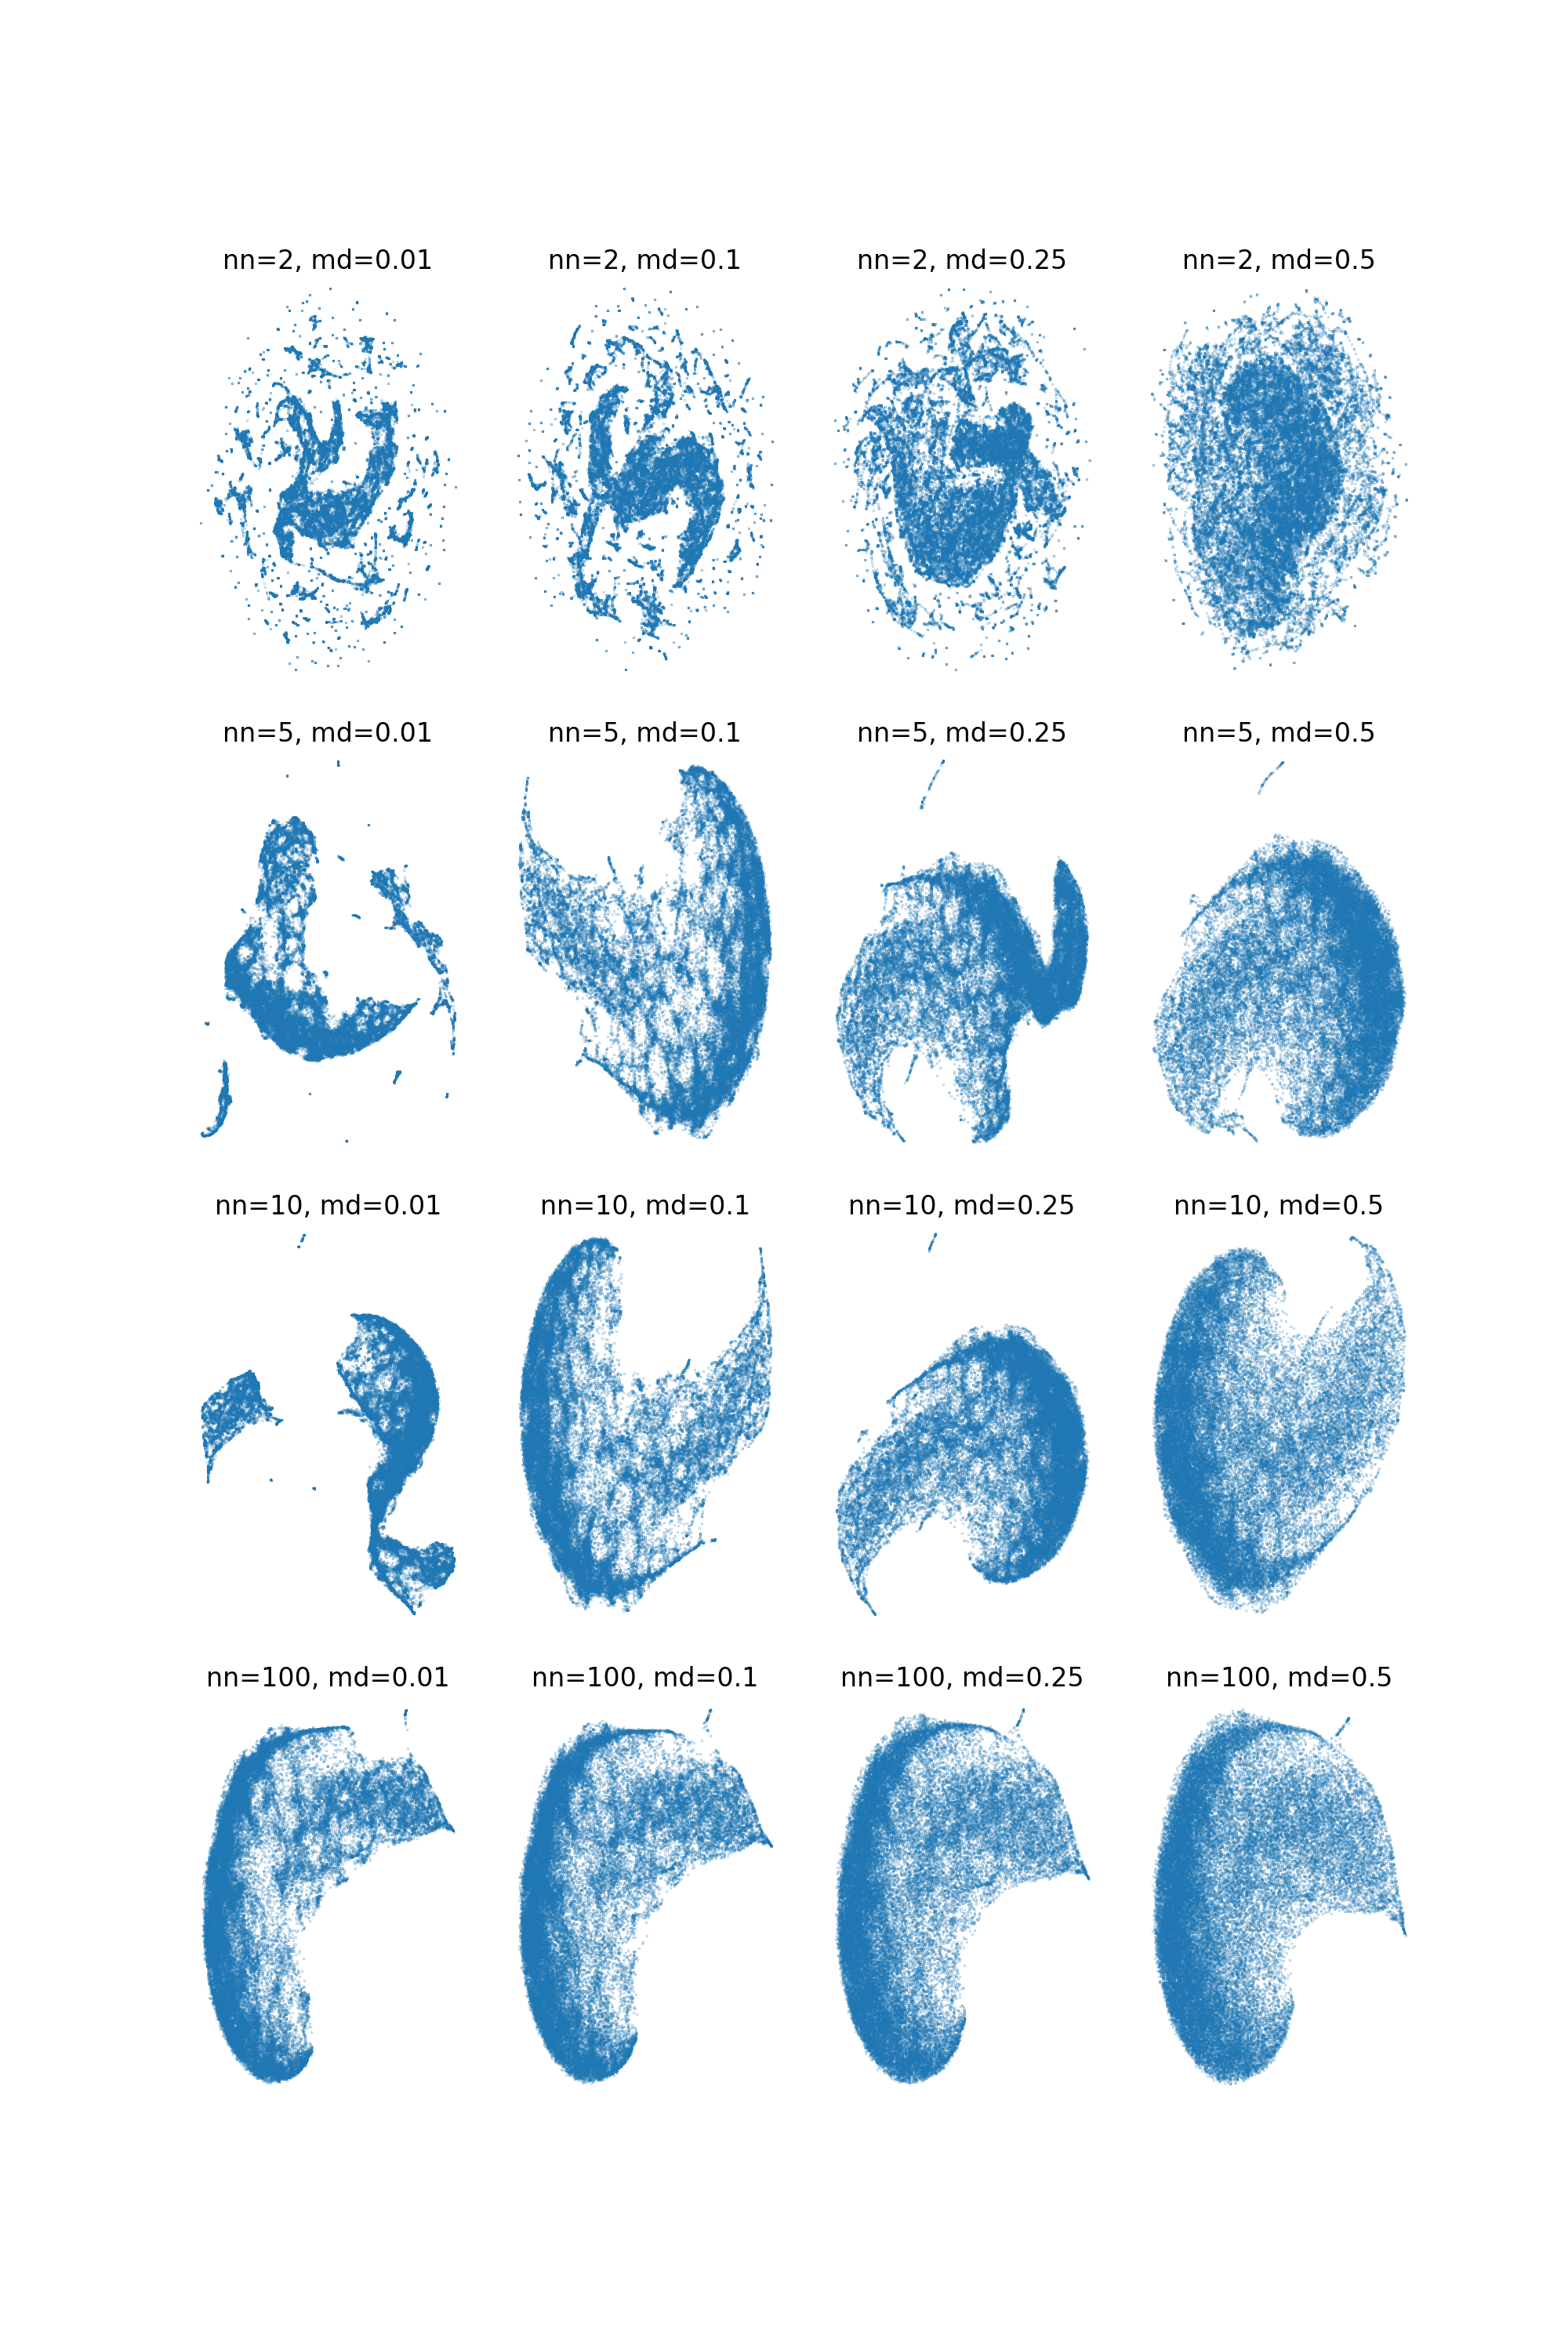

In [185]:
plt.figure(figsize = (10,15))
plt.title('different UMAP parameters for 50K galaxy spectra')

count = 1
for inn, nn in enumerate(nn_list):
    for imd, md in enumerate(md_list):
        umap_results = numpy.load('umap_results/umap_result_nn_{}_md_{}.npy'.format(nn,md))
        x = umap_results[:, 0]
        y = umap_results[:, 1]
        plt.subplot(4, 4, count)
        plt.title('nn={}, md={}'.format(nn, md))
        plt.scatter(x, y, s=0.01)
        plt.axis('off')
        plt.xlim(get_plot_limit(x))
        plt.ylim(get_plot_limit(y))
        
        count += 1
        
#plt.tight_layout()
plt.show()

# Coloring the UMAP
* Here we color the UMAP by measured properties of the galaxies

In [331]:
galSpecLine_df = pandas.read_csv('data/galSpecLine_df_red.csv') # Emission line measurements from MPA-JHU
hdew = numpy.load('data/hdew_red.npy') # H delta EW 
galSpecLine_df.head()

Unnamed: 0  Unnamed: 0.1            SPECOBJID      MJD  PLATEID  FIBERID  \
0      202352        202352  2057063719262775296  53531.0   1827.0    162.0   
1       84527         84527   843393075815409664      NaN      NaN      NaN   
2      157906        157906   605783661945579520      NaN      NaN      NaN   
3       44841         44841  6167763353466806272      NaN      NaN      NaN   
4       67099         67099   859086405429651456      NaN      NaN      NaN   

   SIGMA_BALMER  SIGMA_BALMER_ERR  SIGMA_FORBIDDEN  SIGMA_FORBIDDEN_ERR  \
0      41.04782          3.162199         60.68194             4.512463   
1           NaN               NaN              NaN                  NaN   
2           NaN               NaN              NaN                  NaN   
3           NaN               NaN              NaN                  NaN   
4           NaN               NaN              NaN                  NaN   

      ...       OII_FLUX  OII_FLUX_ERR   OII_VOFF  OII_CHI2  OIII_SIGMA  \
0     ...        42.9969      6.086437 -10.650163  1.171035    83.61781   
1     ...            NaN           NaN        NaN       NaN         NaN   
2     ...            NaN           NaN        NaN       NaN         NaN   
3     ...            NaN           NaN        NaN       NaN         NaN   
4     ...            NaN           NaN        NaN       NaN         NaN   

   OIII_FLUX  OIII_FLUX_ERR  OIII_VOFF  OIII_CHI2  SPECTOFIBER  
0  23.840021       3.152025   7.054807   1.771013     0.752171  
1        NaN            NaN        NaN        NaN          NaN  
2        NaN            NaN        NaN        NaN          NaN  
3        NaN            NaN        NaN        NaN          NaN  
4        NaN            NaN        NaN        NaN          NaN  

[5 rows x 243 columns]

In [346]:
lg.legendHandles[0]._alphas

[1]

<IPython.core.display.Javascript object>


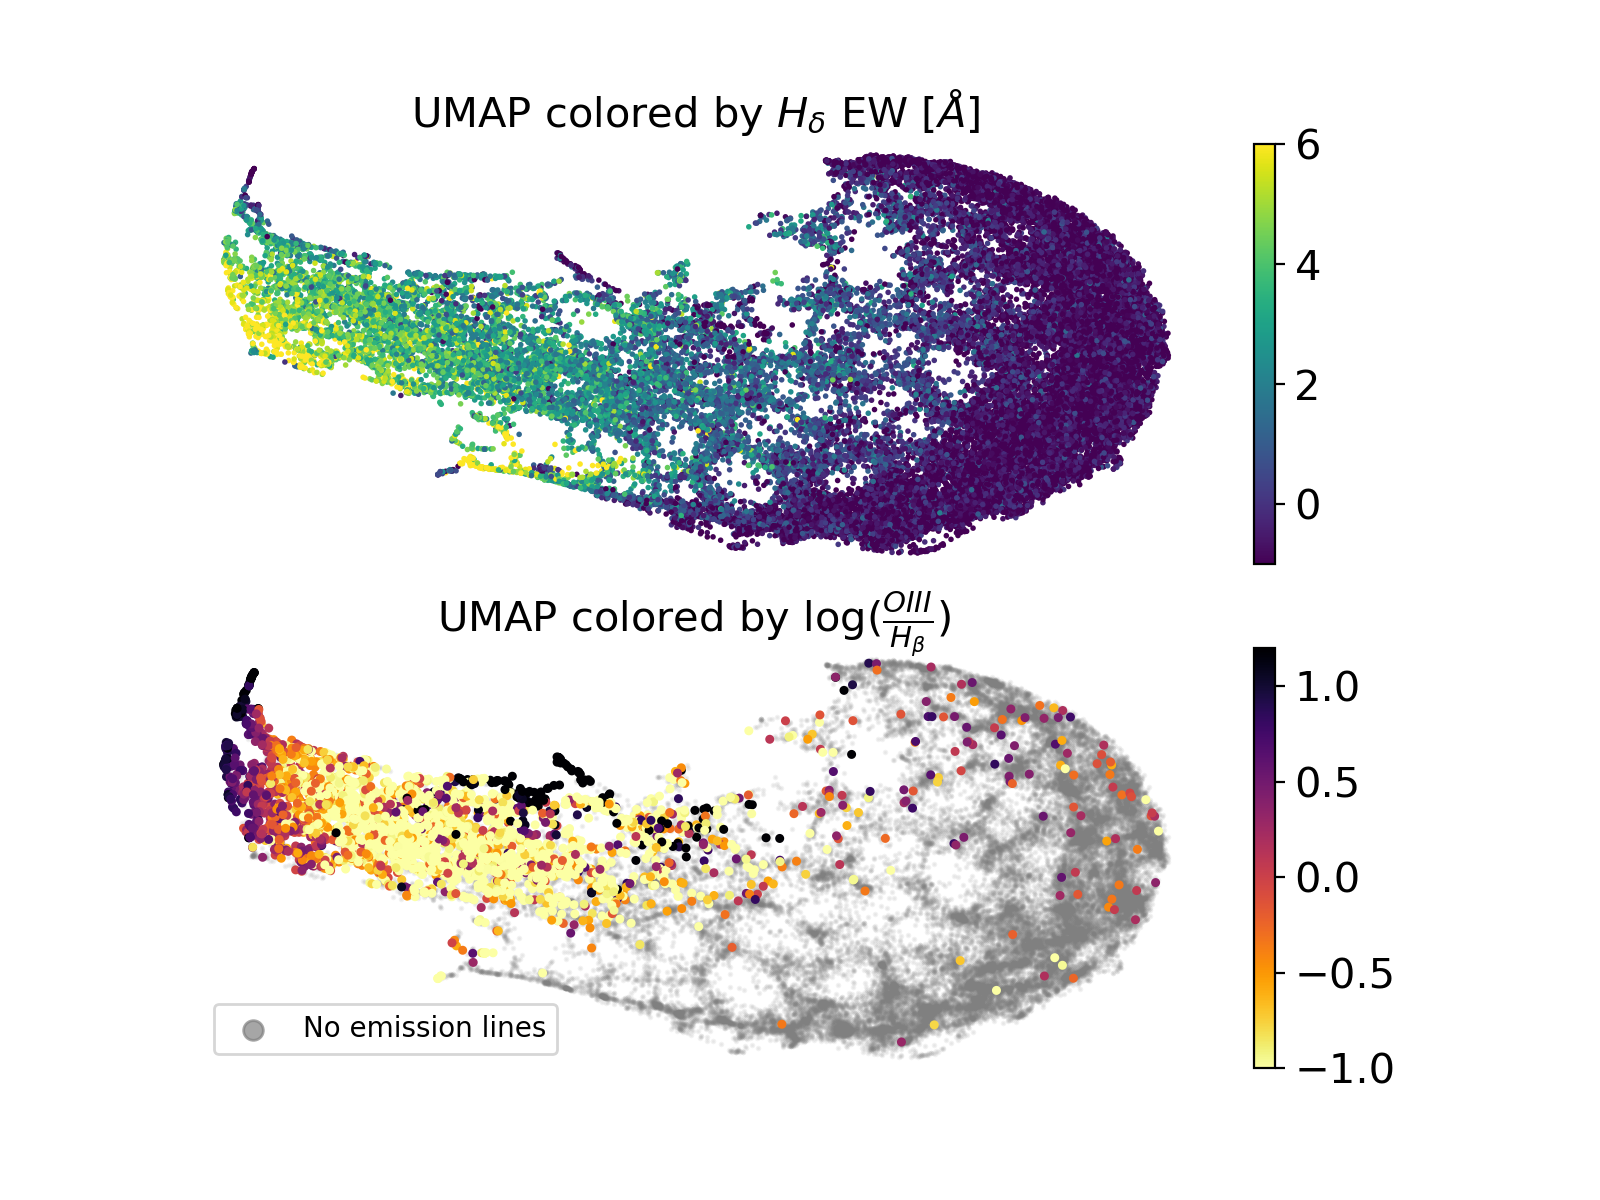

/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in true_divide
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in true_divide
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: divide by zero encountered in log
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in log
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in greater
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/ipykernel_launcher.py:37: RuntimeWarning: invalid value encountered in less
/Users/itamar/anaconda2/envs/ciwsa/lib/python3.6/site-packages/ipykernel_launcher.py:39: RuntimeWarning: invalid value encountered in greater


In [352]:
plt.figure(figsize = (8,6))

umap_res = numpy.load('umap_results/umap_result_nn_5_md_0.1.npy')
umap_x = umap_res[:,0]
umap_y = umap_res[:,1]

plt.subplot(211)
plt.title('UMAP colored by $H_{\delta}$ EW [$\AA$]', fontsize = 15)

color = numpy.array(hdew).copy() 
cut = 6
color[color > cut] = cut
cut = -1
color[color < cut] = cut

finds = numpy.where(numpy.isfinite(color) )[0]
plt.scatter(umap_x[finds],umap_y[finds],s=1, c= color[finds])


plt.axis('off')
plt.xlim(get_plot_limit(umap_x))
plt.ylim(get_plot_limit(umap_y))

cb = plt.colorbar()
cb.ax.tick_params(labelsize = 15)

plt.subplot(212)
plt.title(r'UMAP colored by log($\frac{OIII}{H_{\beta}}$) ', fontsize = 15)

OIII = galSpecLine_df['OIII_FLUX'].values
Hb = galSpecLine_df['H_BETA_FLUX'].values

color = numpy.log(OIII/ Hb).copy() 
cut = 1.2
color[color > cut] = cut
cut = -1
color[color < cut] = cut

finds = numpy.where( numpy.isfinite(color) & (Hb > 100) )[0]
plt.scatter(umap_x,umap_y,s=1, c= 'gray', alpha = 0.1, label='No emission lines')
plt.scatter(umap_x[finds],umap_y[finds],s=5, c= color[finds], cmap = 'inferno_r')
lg = plt.legend(fontsize = 10)
lg.legendHandles[0]._sizes = [50]
lg.legendHandles[0].set_alpha(0.7)

plt.axis('off')
plt.xlim(get_plot_limit(umap_x))
plt.ylim(get_plot_limit(umap_y))

cb = plt.colorbar()
cb.ax.tick_params(labelsize = 15)

plt.show()

# Select galaxies from the UMAP
* Here you can interactively select glaxies from the map and plot their spectra. The selected indecies will be stored in 'selected_inds'. 4 groups are shown as an example.

In [221]:
from matplotlib.widgets import RectangleSelector

def get_inds_click(tmap, xmn, xmx, ymn, ymx):
    inds = numpy.where((tmap[:,0] > xmn) & (tmap[:,0] < xmx) & (tmap[:,1] > ymn) & (tmap[:,1] < ymx))[0]
    return inds

def line_select_callback(eclick, erelease):
    x1, y1 = eclick.xdata, eclick.ydata
    x2, y2 = erelease.xdata, erelease.ydata
    global selected_inds
    selected_inds = get_inds_click(click_map, min(x1,x2), max(x1,x2), min(y1,y2), max(y1,y2))
      
    art = plt.scatter(click_map[click_inds,0], click_map[click_inds,1], s = 100, edgecolors='red', c='none')

def toggle_selector(event):
    if event.key in ['Q', 'q'] and toggle_selector.RS.active:
        toggle_selector.RS.set_active(False)
    if event.key in ['A', 'a'] and not toggle_selector.RS.active:
        toggle_selector.RS.set_active(True)
        
def print_sdss_link(SpecObjID):
    SpecObjID = str(int(SpecObjID))
    print('http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=' + str(SpecObjID) + '&apid=')
    return

In [304]:
[group_1, group_2, group_3, group_4] = numpy.load('data/example_galaxy_groups.npy')

<IPython.core.display.Javascript object>


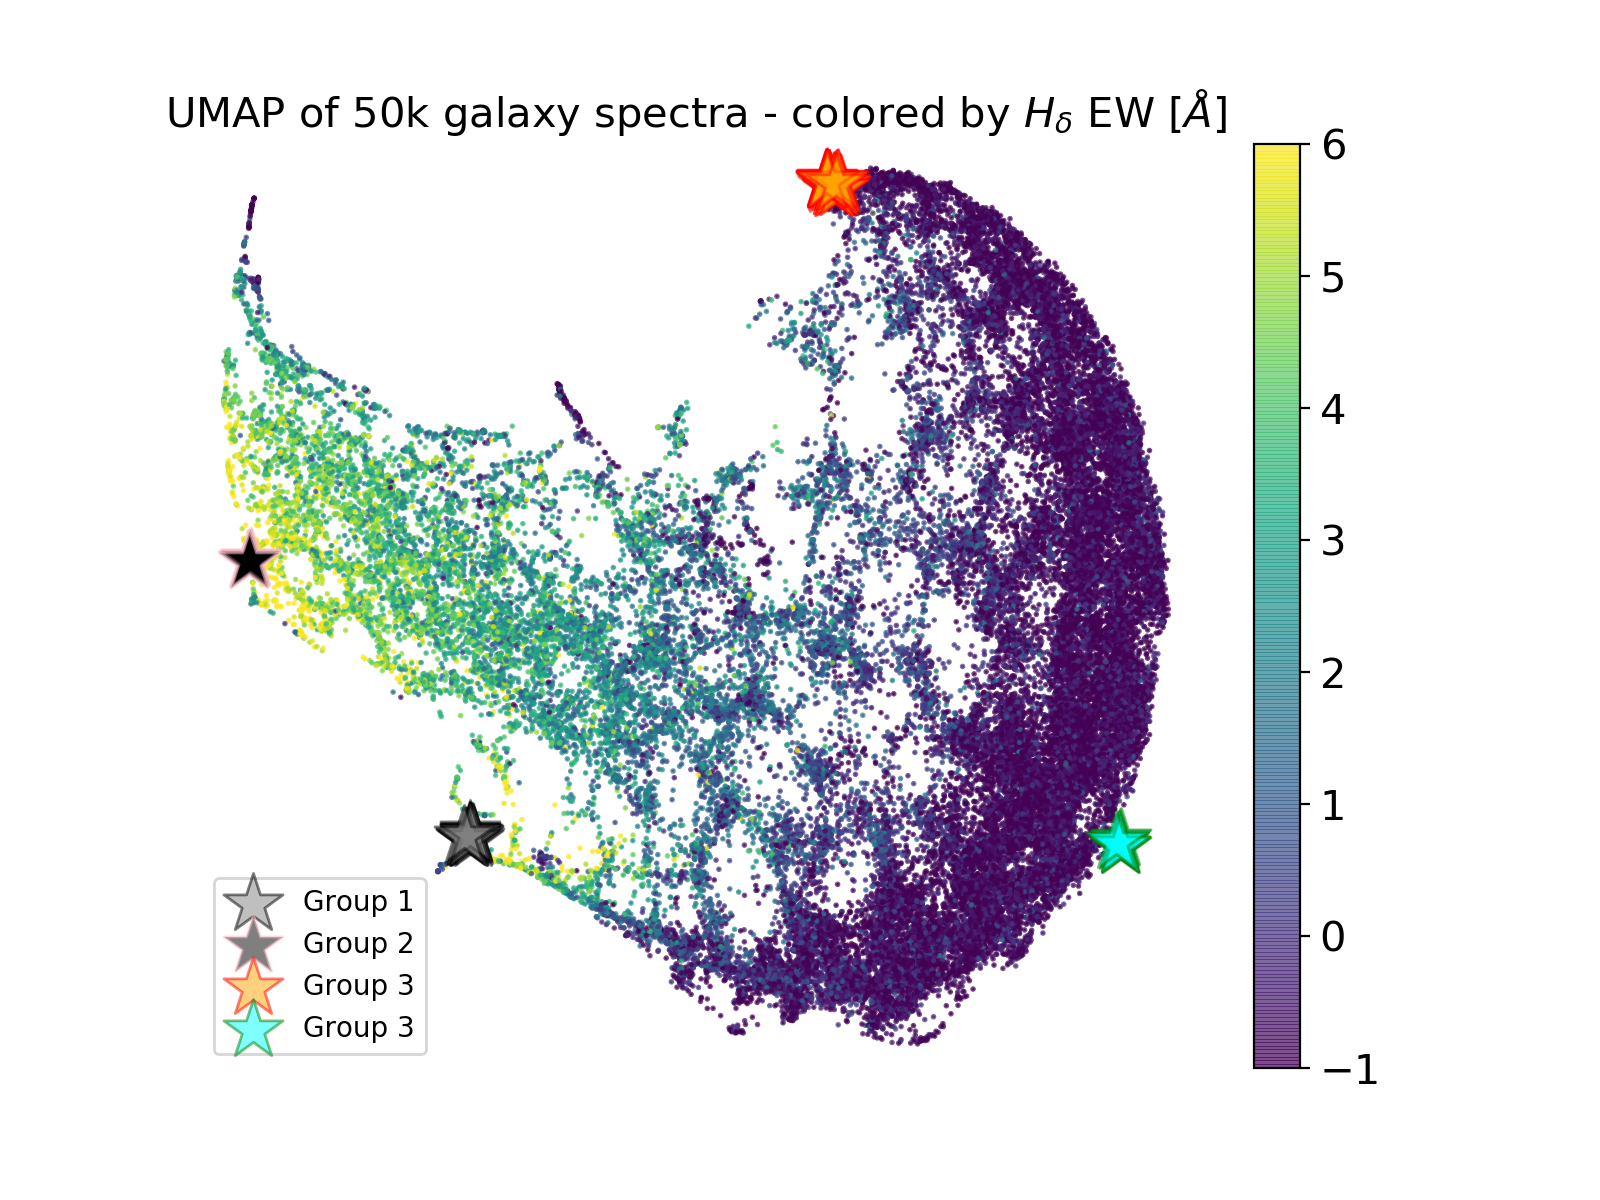

In [355]:
hdew = numpy.load('data/hdew_red.npy')
plt.figure(figsize = (8,6))

umap_x = umap_res[:,0]
umap_y = umap_res[:,1]
click_map = umap_res.copy()
color = numpy.array(hdew).copy() 
cut = 6
color[color > cut] = cut
cut = -1
color[color < cut] = cut

finds = numpy.where(numpy.isfinite(color) )[0]
plt.scatter(umap_x[finds],umap_y[finds],s=1, c= color[finds], alpha = 0.7)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 15)

plt.scatter(umap_x[group_1],umap_y[group_1],marker='*',s = 500, edgecolors='black', color='gray', alpha = 0.5, label ='Group 1')
plt.scatter(umap_x[group_2],umap_y[group_2],marker='*',s = 500, edgecolors='pink', color='black', alpha = 0.5, label ='Group 2')
plt.scatter(umap_x[group_3],umap_y[group_3],marker='*',s = 500, edgecolors='red', color='orange', alpha = 0.5, label ='Group 3')
plt.scatter(umap_x[group_4],umap_y[group_4],marker='*',s = 500, edgecolors='green', color='cyan', alpha = 0.5, label ='Group 3')


plt.legend(fontsize = 10)
plt.title('UMAP of 50k galaxy spectra - colored by $H_{\delta}$ EW [$\AA$]', fontsize = 15)
plt.axis('off')
plt.xlim(get_plot_limit(umap_x))
plt.ylim(get_plot_limit(umap_y))



plt.show()

current_ax = plt.gca()
#xn, xx = current_ax.get_xlim(); print(xn, xx)
#yn, yx = current_ax.get_ylim(); print(yn, yx)
toggle_selector.RS = RectangleSelector(current_ax, line_select_callback,
                                           drawtype='box', useblit=True,
                                           button=[1, 3],  # don't use middle button
                                           minspanx=5, minspany=5,
                                       spancoords='pixels',
                                           interactive=True)
event = plt.connect('key_press_event', toggle_selector)

In [282]:
import matplotlib.image as mpimg
def show_sdss_spectra(specobjid):
    print_sdss_link(specobjid)
    plt.figure(figsize = (10,7))
    plt.imshow(mpimg.imread('http://skyserver.sdss.org/dr14/en/get/SpecById.ashx?id=' + dr14_specobjid))
    plt.axis('off')
    plt.tight_layout()
    plt.show()

In [257]:
print(group_1)
for i in group_1:
    dr14_specobjid = SpecObjIDS[i]
    print_sdss_link(dr14_specobjid)

[  413   988  2552  8940 10272 15790 21036 27023 27289 31071 31343 36585
 36890 37960 39902 40922 48712 48752]
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=817466041876637696&apid=
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2176411305894766592&apid=
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=1156430638866262016&apid=
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=1939939074022336512&apid=
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=3345192461382215680&apid=
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2673058790458288128&apid=
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2367807969308993536&apid=
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2809182734902126592&apid=
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=887341656968292352&apid=
http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=2635757

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=817466041876637696&apid=


<IPython.core.display.Javascript object>


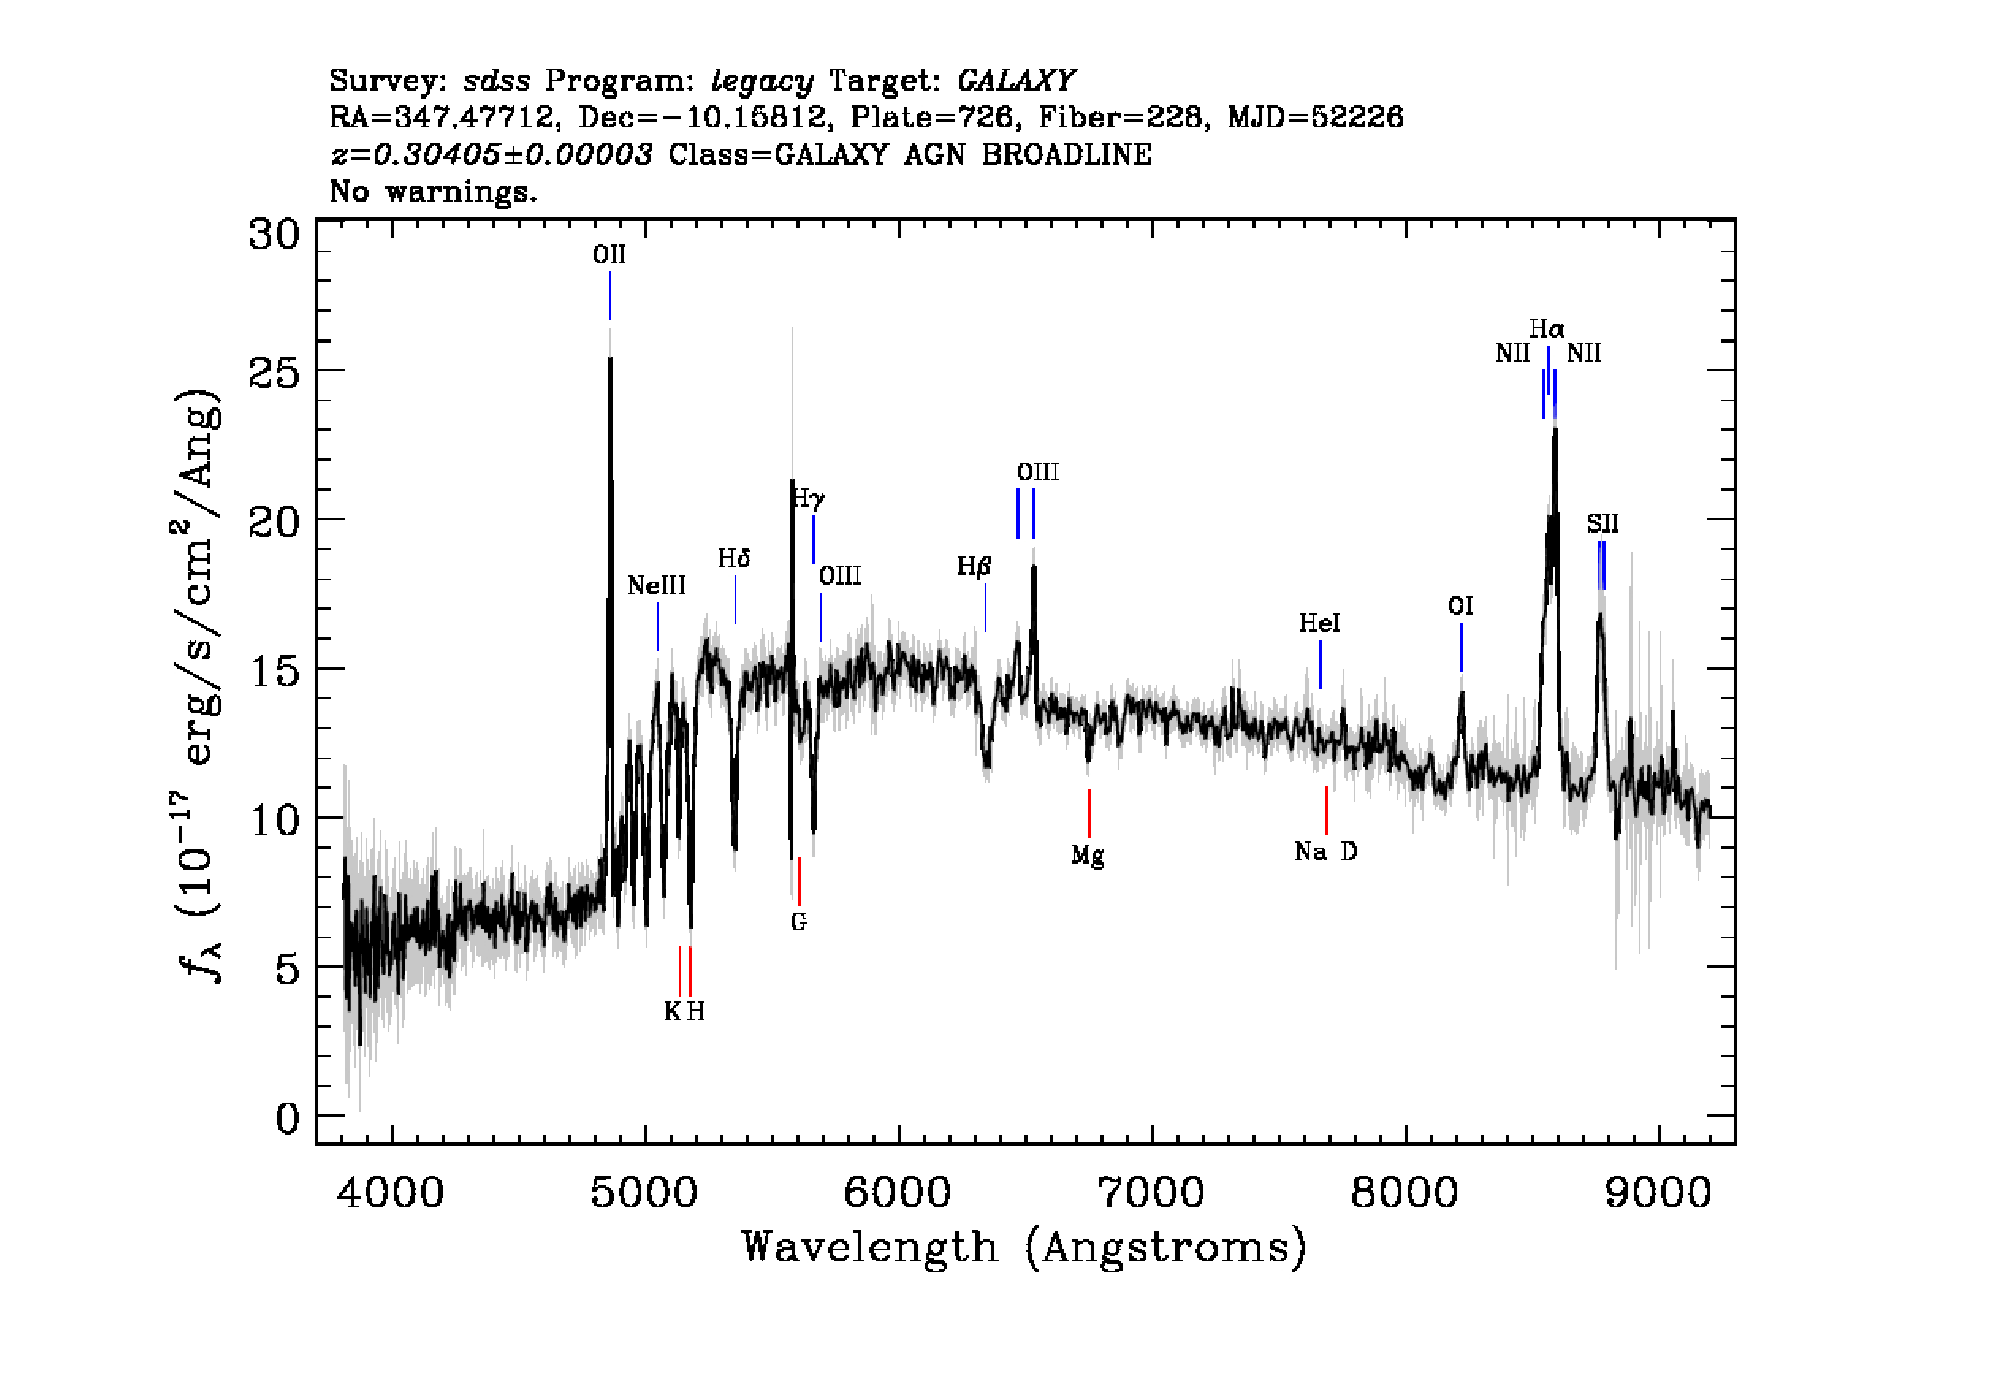

In [283]:
dr14_specobjid = str(SpecObjIDS[group_1[0]])
show_sdss_spectra(dr14_specobjid)

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=1139561383260612608&apid=


<IPython.core.display.Javascript object>


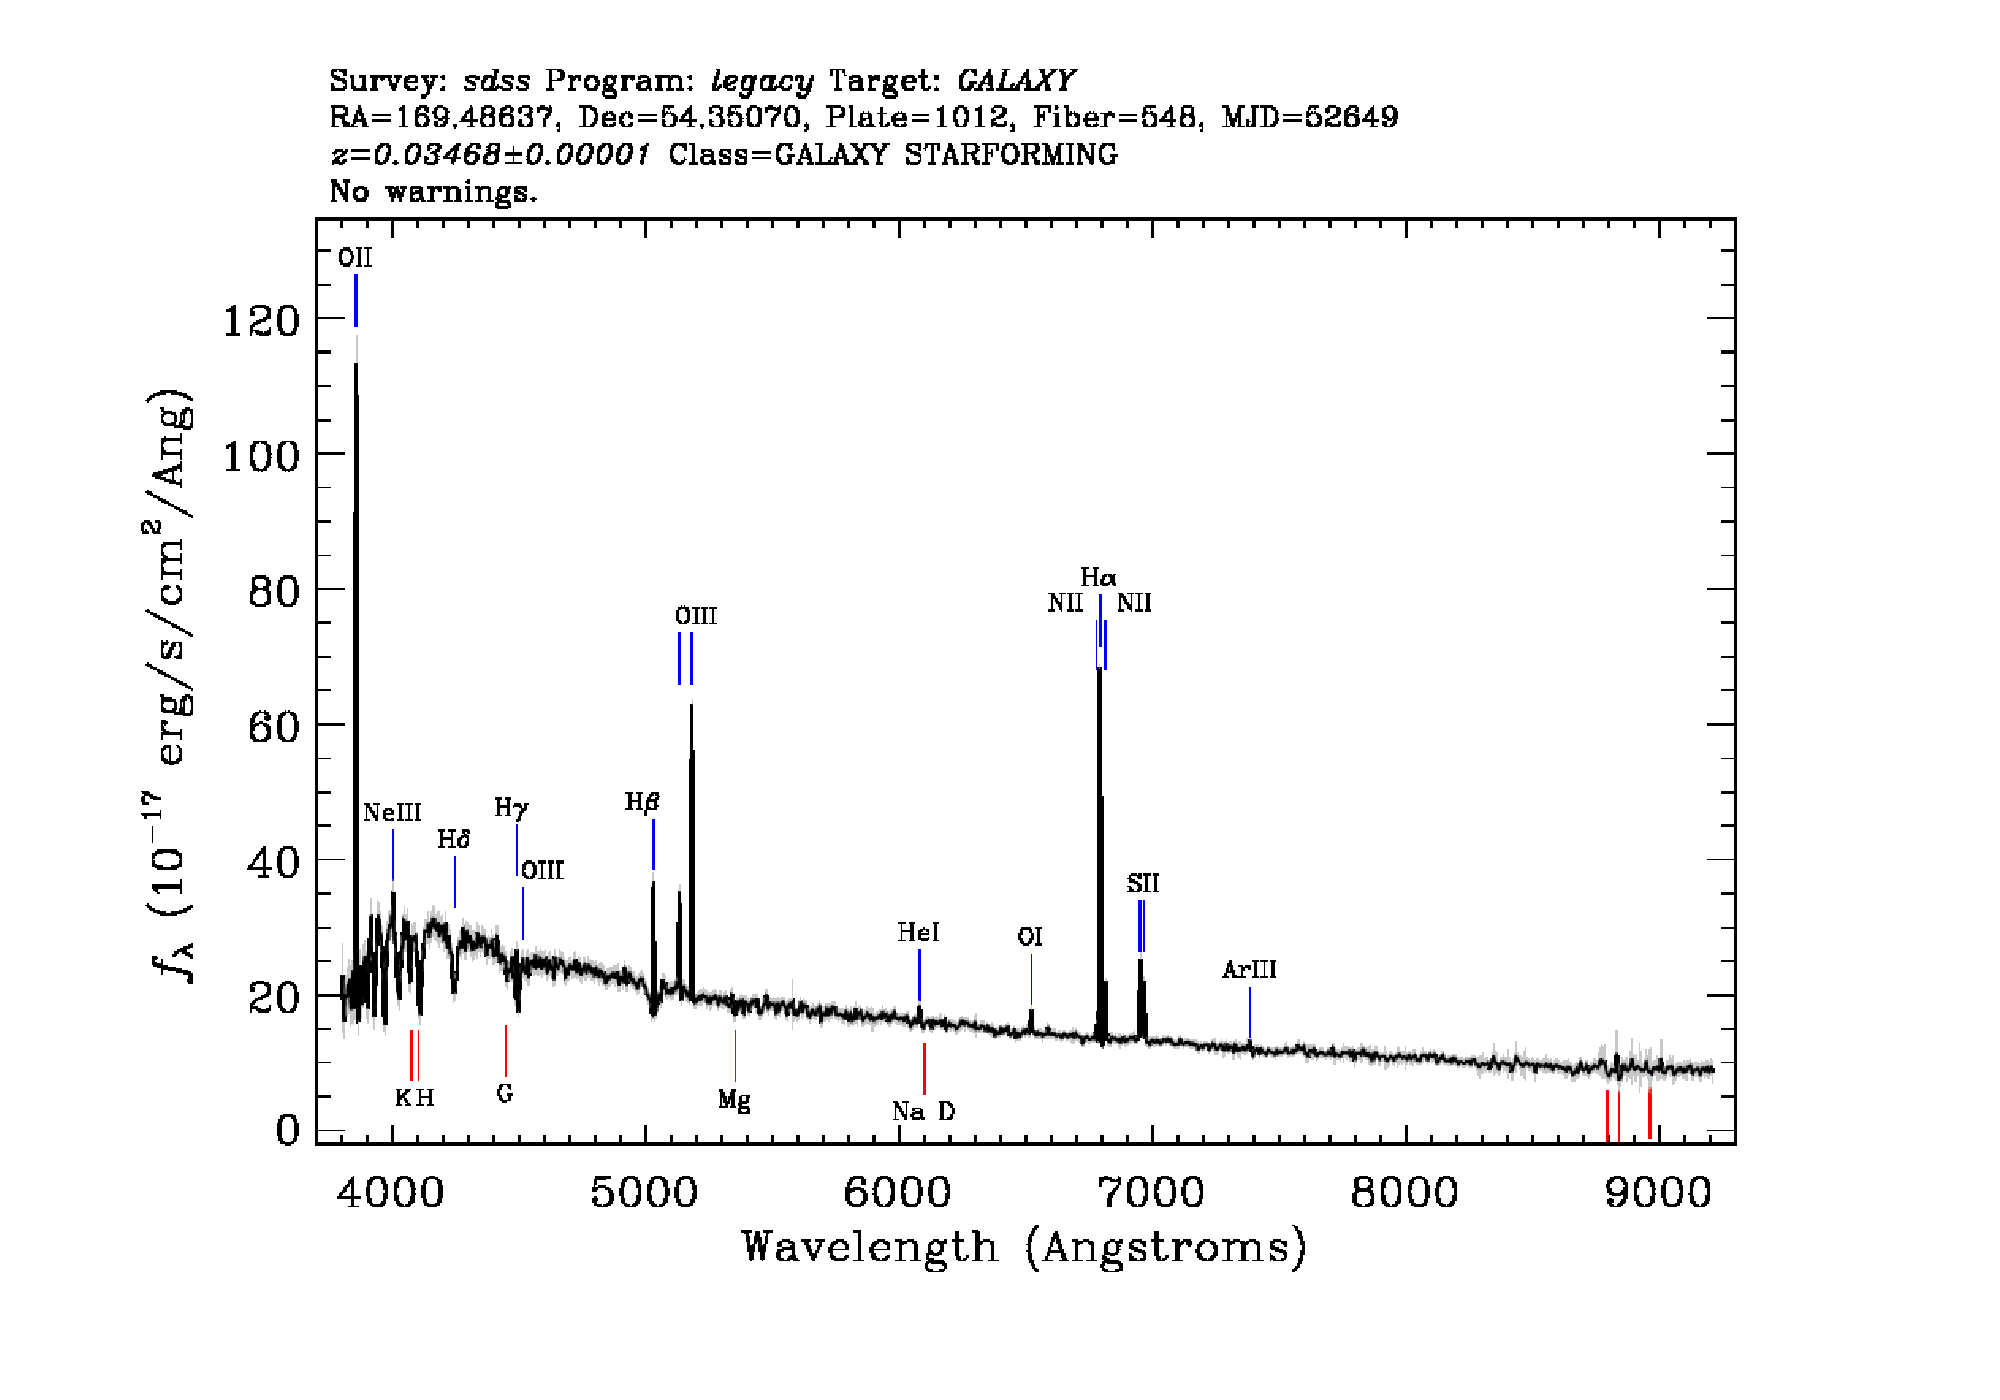

In [284]:
dr14_specobjid = str(SpecObjIDS[group_2[0]])
show_sdss_spectra(dr14_specobjid)

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=1474999572471244800&apid=


<IPython.core.display.Javascript object>


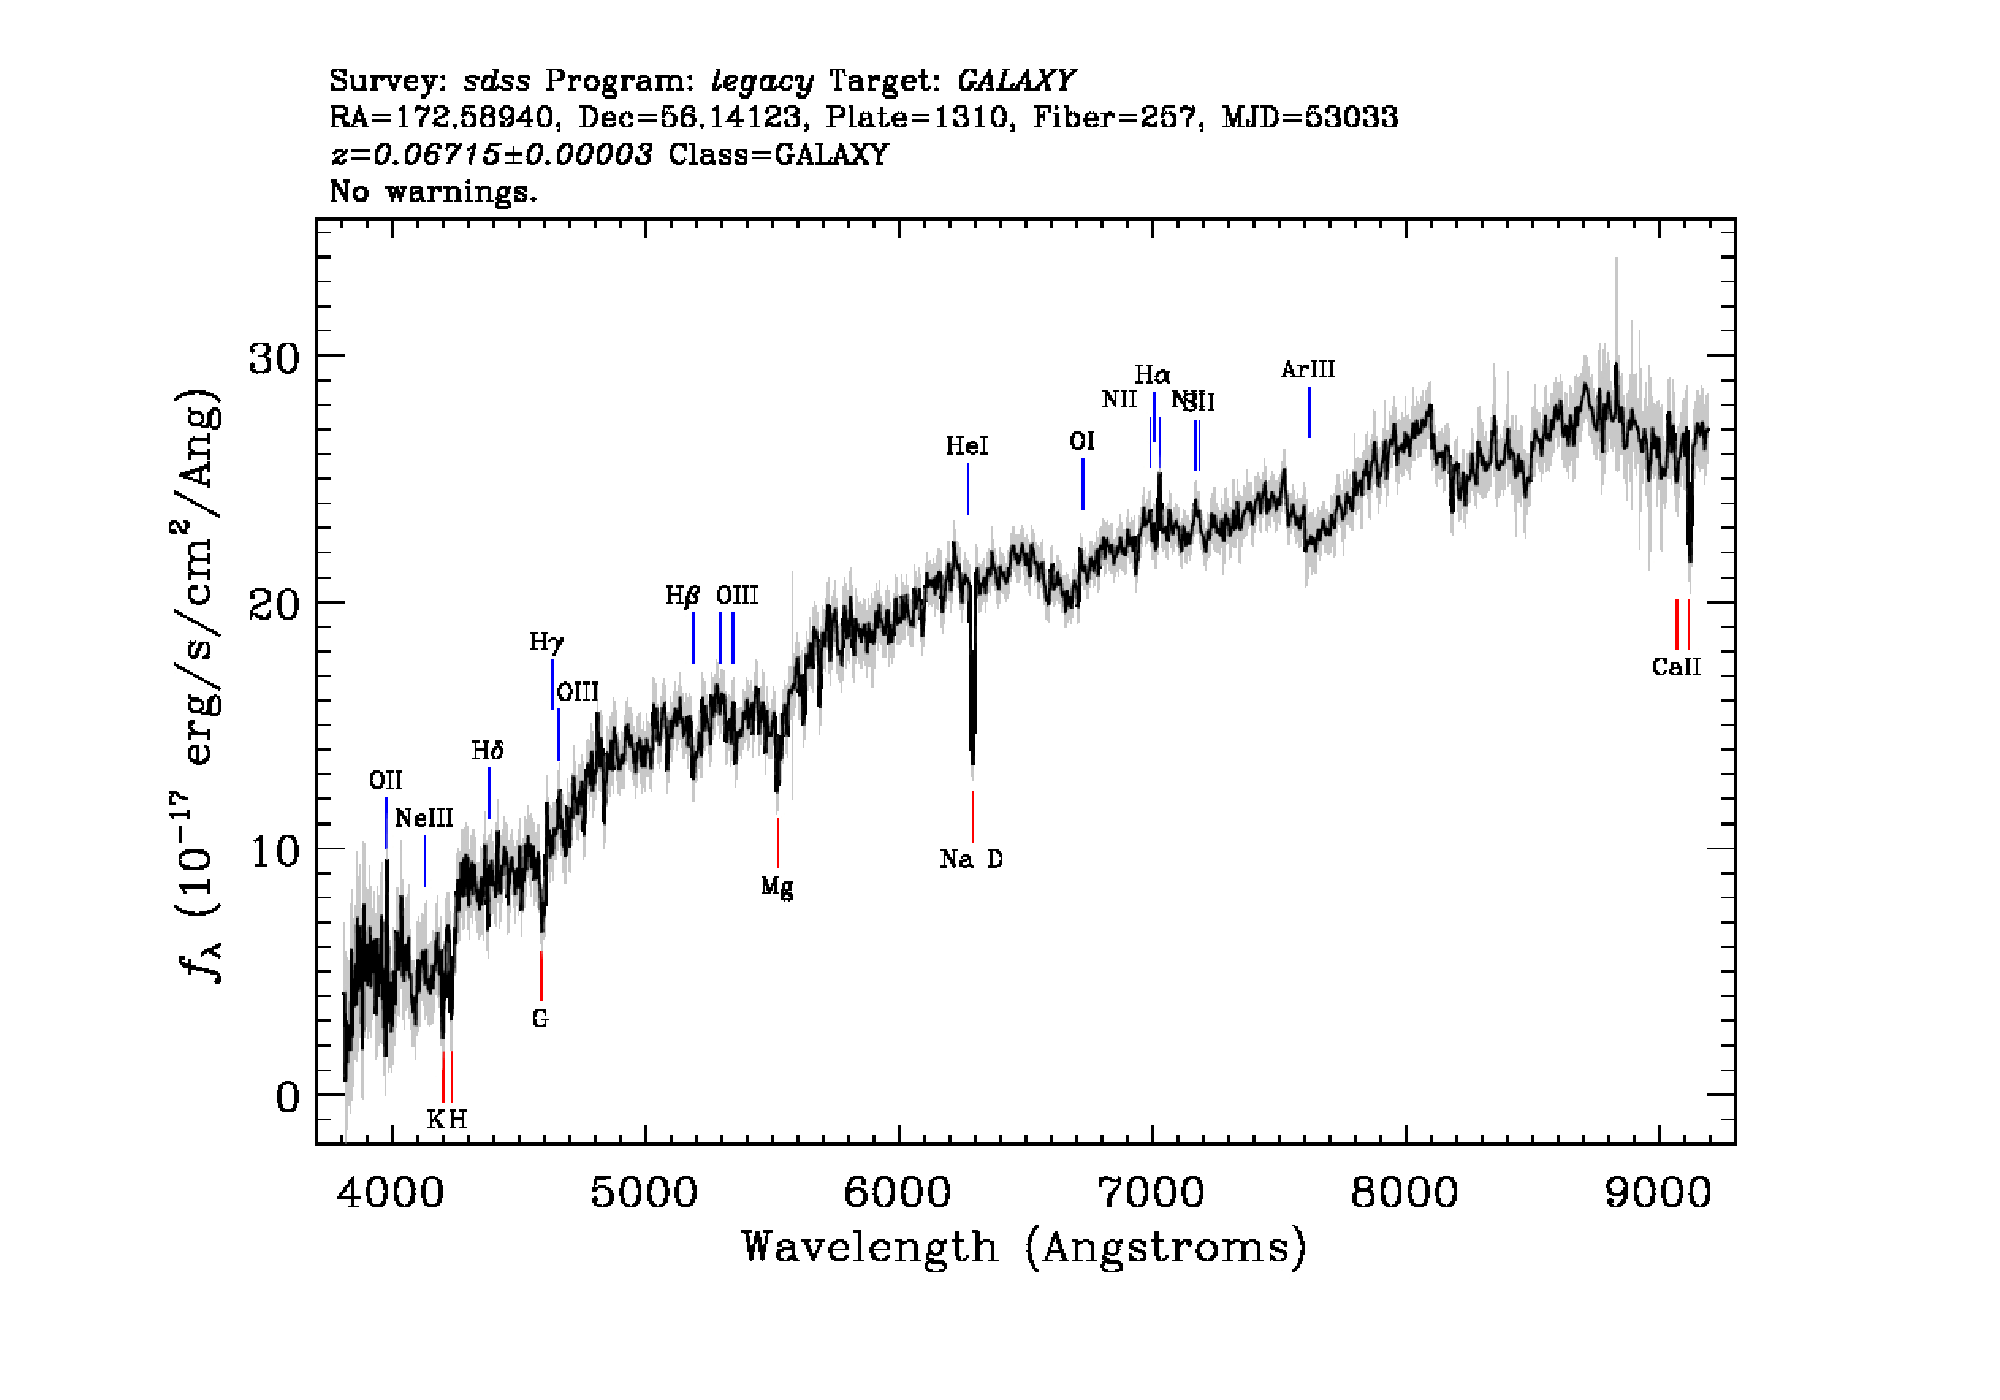

In [285]:
dr14_specobjid = str(SpecObjIDS[group_3[0]])
show_sdss_spectra(dr14_specobjid)

http://skyserver.sdss.org/dr14/en/tools/explore/summary.aspx?sid=4508225087183233024&apid=


<IPython.core.display.Javascript object>


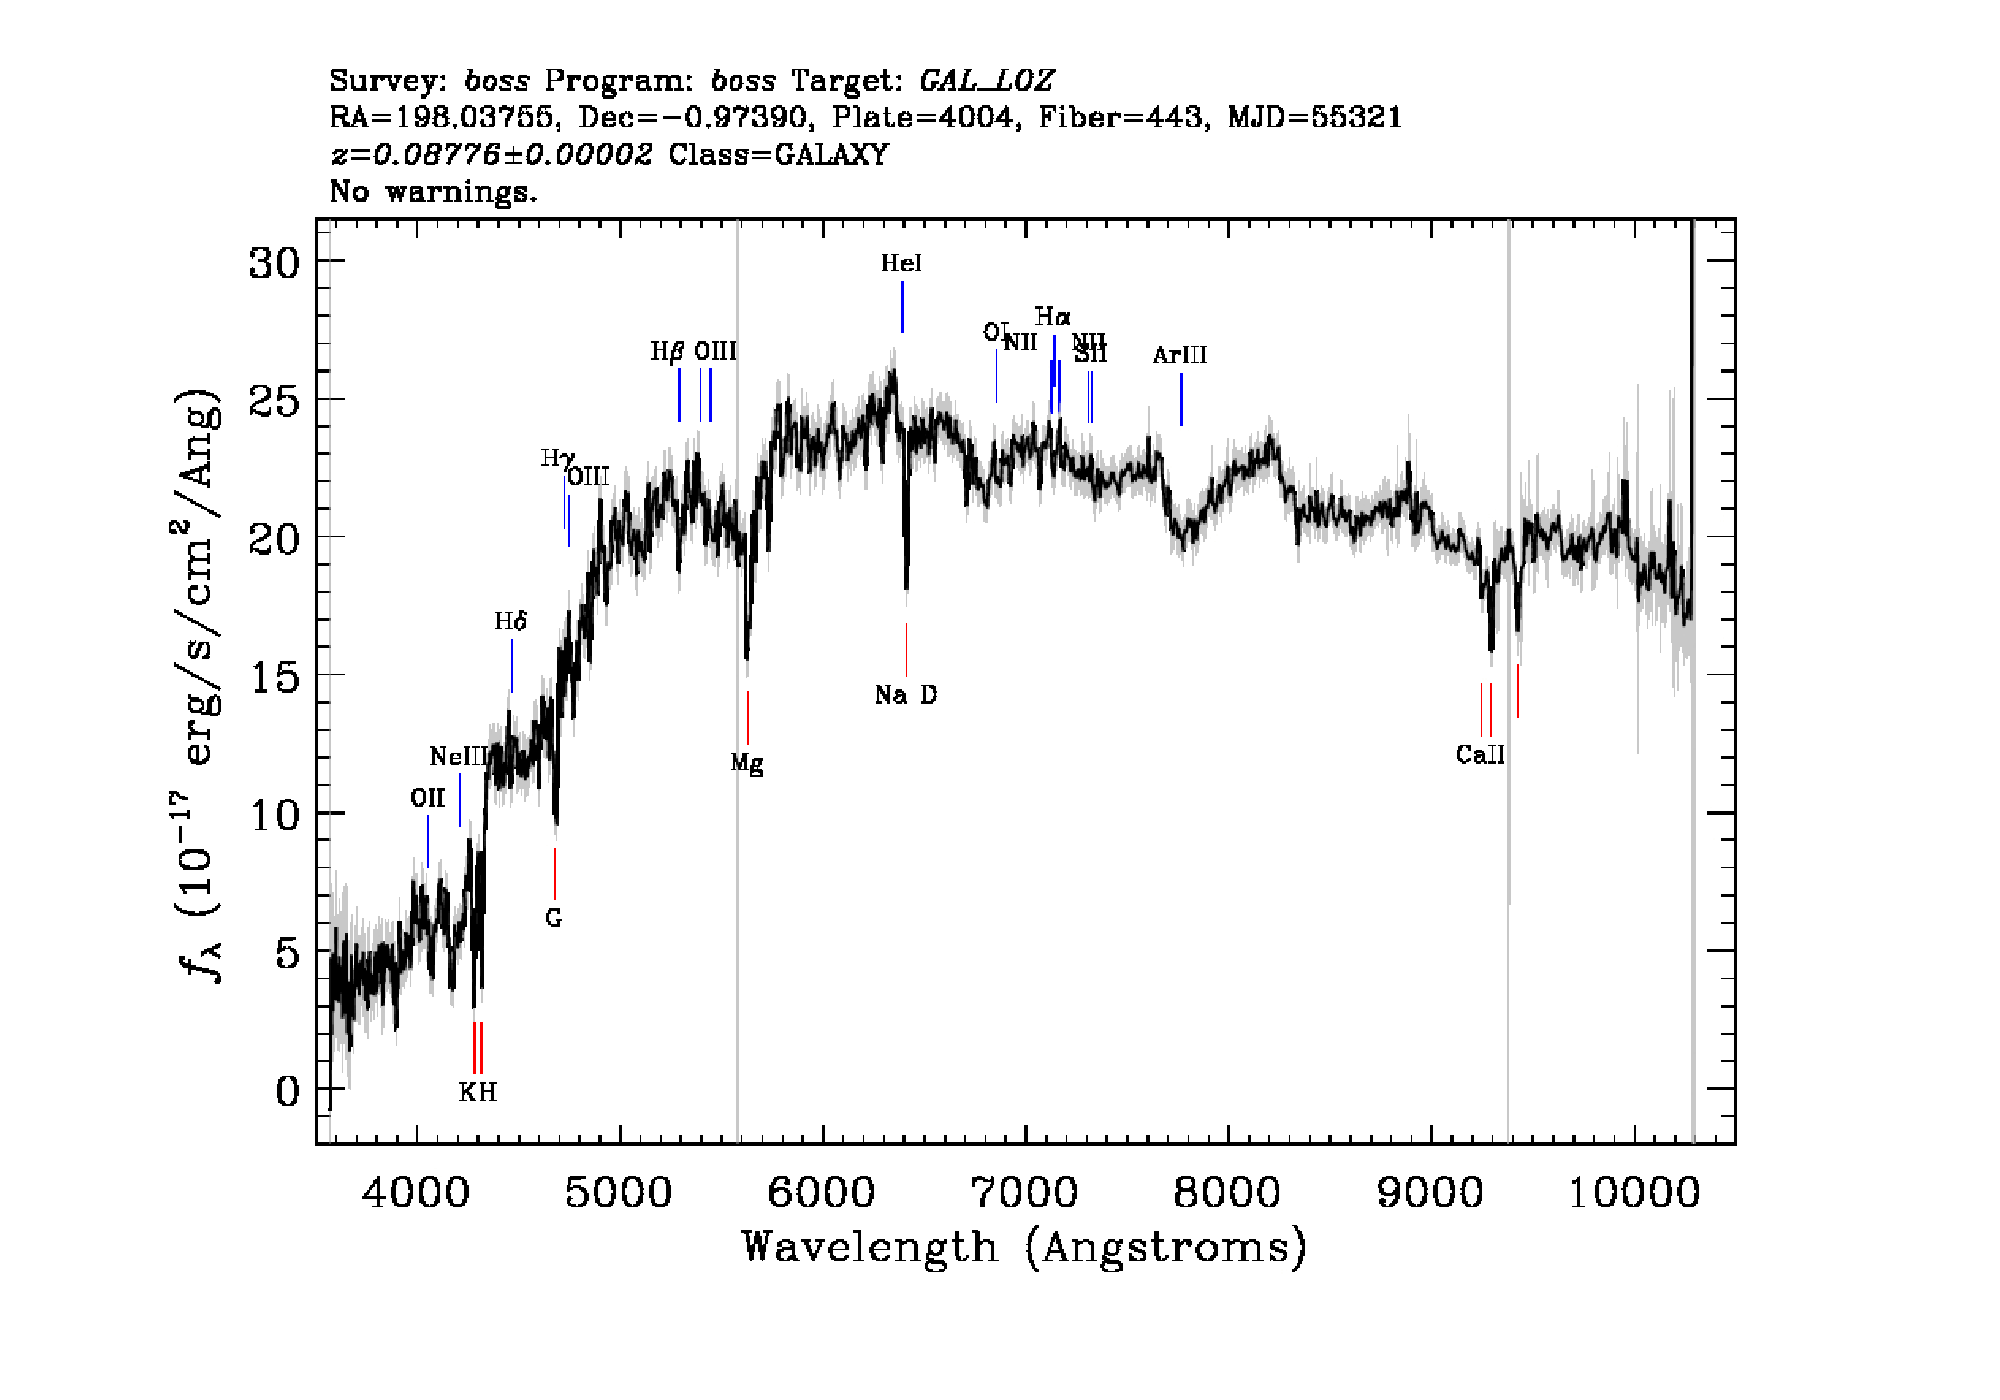

In [302]:
dr14_specobjid = str(SpecObjIDS[group_4[0]])
show_sdss_spectra(dr14_specobjid)